In [75]:
import os
import fnmatch
import re
import pandas as pd; print("pandas:", pd.__version__)
import natsort; print("natsort:", natsort.__version__)
import matplotlib; print("matplotlib:", matplotlib.__version__)
import matplotlib.pyplot as plt
import numpy as np; print("numpy:", np.__version__)

pandas: 0.25.3
natsort: 6.2.0
matplotlib: 3.1.1
numpy: 1.17.3


In [2]:
LENET5_VANILLA_PATH = os.path.join(os.getcwd(), "lenet5")

In [3]:
# Utils
def load_csv(filename: str):
    '''Loads data from csv file and return as DataFrame.
    '''
    data = pd.read_csv(filename, index_col=[0])
    return data

# LeNet5 Vanilla
## Training

In [4]:
# load train logs dataframe
lenet5V_train_df = load_csv(os.path.join(LENET5_VANILLA_PATH, "train_logs.csv"))
lenet5V_train_df.head()

,epoch,t_mean_accuracy,t_mean_brier,t_mean_entropy,t_mean_loss,v_mean_accuracy,v_mean_brier,v_mean_entropy,v_mean_loss,ov_mean_brier,ov_mean_entropy
0,0,0.120781,7.797405,2.300489,2.299965,0.093756,7.924933,2.300478,2.302244,7.889420,1.977733
1,1,0.124997,7.752395,2.300603,2.291403,0.093756,7.924700,2.300378,2.292700,8.001288,1.650988
2,2,0.123305,7.927422,2.300276,2.274992,0.093756,7.924833,2.299878,2.268467,8.298127,0.815391
3,3,0.168084,7.904773,2.298878,2.236219,0.239567,7.924556,2.297911,2.213822,8.534562,0.309487
4,4,0.356427,7.794811,2.293368,2.152676,0.402778,7.927033,2.286322,2.097500,8.637979,0.113066


## Test

In [5]:
def load_rotated():
    '''Returns a dictionary of pandas datasets for tests with rotated data.
    '''
    # get filenames
    files = [fn for fn in os.listdir(LENET5_VANILLA_PATH) if os.path.isfile(os.path.join(LENET5_VANILLA_PATH, fn))]        
    paths = fnmatch.filter(files, '*rotate*')
    paths = natsort.natsorted(paths)
    #print(paths)

    # load as pandas
    degree_regex = re.compile('\d+')
    dataframes = {}
    for filename in paths:
        df = load_csv(os.path.join(LENET5_VANILLA_PATH, filename))
        name = degree_regex.findall(filename)[0]
        dataframes[name] = df

    return dataframes


def load_shifted():
    '''Returns a dictionary of pandas datasets for tests with shifted data. tests with shifted data.
    '''
    # get filenames
    files = [fn for fn in os.listdir(LENET5_VANILLA_PATH) if os.path.isfile(os.path.join(LENET5_VANILLA_PATH, fn))]        
    paths = fnmatch.filter(files, '*shift*')
    paths = natsort.natsorted(paths)
    #print(paths)

    # load as pandas
    pixel_regex = re.compile('\d+')
    dataframes = {}
    for filename in paths:
        df = load_csv(os.path.join(LENET5_VANILLA_PATH, filename))
        name = pixel_regex.findall(filename)[0]
        dataframes[name] = df
        
    return dataframes

#print(load_rotated())
#print(load_shifted())

In [49]:
def get_accuracy(df: pd.DataFrame):    
    accuracy_row = df['t_good_pred']
    accuracy = accuracy_row.sum() / accuracy_row.count()
    return accuracy

def get_brier(df: pd.DataFrame):
    brier_row = df['t_brier']
    return brier_row.mean()

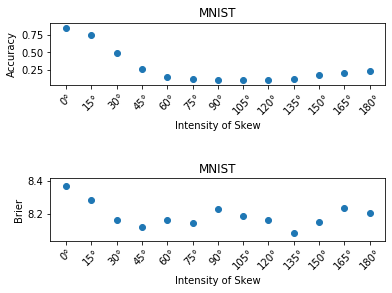

In [69]:
def plot_rotated(dataset_name: str):
    accuracy_dict = {}
    brier_dict = {}

    # load dataframes
    original_df = load_csv(os.path.join(LENET5_VANILLA_PATH, "mnist.csv"))   
    rotated_dict = load_rotated()

    # get accuracy
    accuracy_dict["R0"] = get_accuracy(original_df)
    for key in rotated_dict.keys():        
        accuracy_dict[f"R{key}"] = get_accuracy(rotated_dict[key])

    # get brier
    brier_dict["R0"] = get_brier(original_df)
    for key in rotated_dict.keys():        
        brier_dict[f"R{key}"] = get_brier(rotated_dict[key])

    # plot
    xlabels = [f"{v}°" for v in range(0, 195, 15)]

    plt.subplot(211)
    plt.scatter(x=xlabels, y=accuracy_dict.values())
    plt.title(str.upper(dataset_name))
    plt.xlabel("Intensity of Skew")
    plt.xticks(rotation=45)
    plt.ylabel("Accuracy")

    plt.subplot(212)
    plt.scatter(x=xlabels, y=brier_dict.values())
    plt.title(str.upper(dataset_name))
    plt.xlabel("Intensity of Skew")
    plt.xticks(rotation=45)
    plt.ylabel("Brier")

    plt.subplots_adjust(hspace=1.5)
    plt.show()

plot_rotated("mnist")

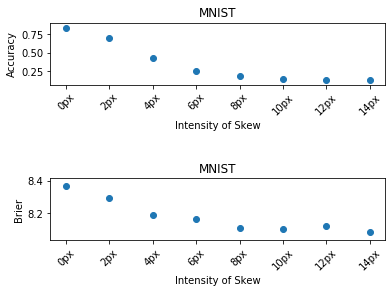

In [68]:
def plot_shifted(dataset_name: str):
    accuracy_dict = {}
    brier_dict = {}

    # load dataframes
    original_df = load_csv(os.path.join(LENET5_VANILLA_PATH, "mnist.csv"))   
    shifted_dict = load_shifted()

    # get accuracy
    accuracy_dict["R0"] = get_accuracy(original_df)
    for key in shifted_dict.keys():        
        accuracy_dict[f"R{key}"] = get_accuracy(shifted_dict[key])

    # get brier
    brier_dict["R0"] = get_brier(original_df)
    for key in shifted_dict.keys():        
        brier_dict[f"P{key}"] = get_brier(shifted_dict[key])

    # plot
    xlabels = [f"{v}px" for v in range(0, 16, 2)]

    plt.subplot(211)
    plt.scatter(x=xlabels, y=accuracy_dict.values())
    plt.title(str.upper(dataset_name))
    plt.xlabel("Intensity of Skew")
    plt.xticks(rotation=45)
    plt.ylabel("Accuracy")

    plt.subplot(212)
    plt.scatter(x=xlabels, y=brier_dict.values())
    plt.title(str.upper(dataset_name))
    plt.xlabel("Intensity of Skew")
    plt.xticks(rotation=45)
    plt.ylabel("Brier")

    plt.subplots_adjust(hspace=1.5)
    plt.show()

plot_shifted("mnist")

In [87]:
def plot_confidence_vs_accuracy_60():
    # load rotated 60° dataframe
    df = load_csv(os.path.join(LENET5_VANILLA_PATH, "mnist_rotate60.csv"))    

    confidence_range = np.arange(0.0, 1, 0.1)
    acc_conf_df = df[['t_good_pred', 't_confidence']]
    #print(acc_conf_df.head())

    # select data based on confidence value
    acc_conf_dict = {}
    for cv in confidence_range:
        acc_df = acc_conf_df.loc[df['t_confidence'] >= cv]['t_good_pred']
        # print("Confidence: ", cv)
        # print(acc_df.head())
        # print(conf_df.count())
        accuracy = acc_df.sum() / acc_df.count() 
        acc_conf_dict[cv] = accuracy

    return acc_conf_dict

print(plot_confidence_vs_accuracy_60())

{0.0: 0.1583533653846154, 0.1: 0.4408812046848857, 0.2: 0.6317473010795682, 0.30000000000000004: 0.8143939393939394, 0.4: 0.9561989606533037, 0.5: 1.0, 0.6000000000000001: 1.0, 0.7000000000000001: 1.0, 0.8: 1.0, 0.9: 1.0}
